In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('titanic1.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [84]:
data.drop(['Name', 'Fare', 'Age'], axis=1, inplace=True)
data.head()
data['Sex'] = data['Sex'].map({
  'male' :1,
  'female':0
})
data.head()

,Survived,Pclass,Sex,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,1,1,0
1,1,1,0,1,0
2,1,3,0,0,0
3,1,1,0,1,0
4,0,3,1,0,0


In [85]:
x = data.drop('Survived',axis=1)
y = data['Survived']

In [86]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In case of Gaussian distribution, the y values should be in 1-D array and the x values should be in 2-D array.

In [87]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [88]:
newData = [[2,1,0,0]]
predict = model.predict(newData)
print(predict)

[0]


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [89]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(ytest, ypred, labels=[0,1])
print("Confusion Matrix we want is: \n", conf)

TP = conf[0][0]
TN = conf[1][1]
FP = conf[1][0]
FN = conf[0][1]

print("True Positives", TP)
print("True Negatives", TN)
print("False Positives", FP)
print("False Negatives", FN)

Confusion Matrix we want is: 
 [[97 20]
 [20 41]]
True Positives 97
True Negatives 41
False Positives 20
False Negatives 20


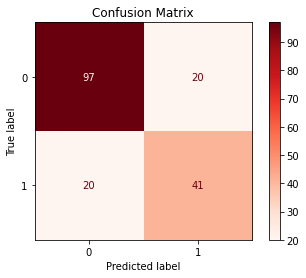

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

In [91]:
from sklearn.metrics import f1_score, precision_score, recall_score,matthews_corrcoef
print(f"Recall Score: {recall_score(ytest, ypred):.3}")
print(f"Specitivity Score: {TN/(TN+FP):.3}")
print(f"Precision Score: {precision_score(ytest, ypred):.3}")
print(f"Negative Prediction Value: {TN/(TN+FN):.3}")
print(f"F1 Score: {f1_score(ytest, ypred):.3}")
print(f"Matthews Correlation Coefficient: {matthews_corrcoef(ytest, ypred):.3}")

Recall Score: 0.672
Specitivity Score: 0.672
Precision Score: 0.672
Negative Prediction Value: 0.672
F1 Score: 0.672
Matthews Correlation Coefficient: 0.501


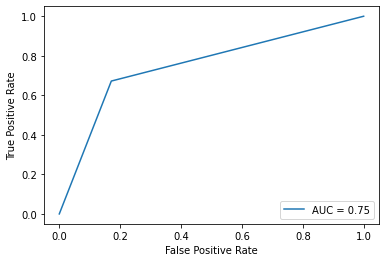

In [92]:
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()